## EJERCICIO 2 E.D: EXPLORANDO CON GEOPANDAS

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point, Polygon

In [18]:
bd_path = "hotosm_chl_buildings_polygons_shp/hotosm_chl_buildings_polygons.shp"
df_buildings = gpd.read_file(bd_path,encoding='utf-8')

In [ ]:
#ax = df_buildings.plot(figsize = (50,50))

#ax.set_xlim([-70,9,-70,4])
#ax.set_ylim([-33,25,-33,75])


In [97]:
from collections import namedtuple

Box = namedtuple('Box', 'xmin, xmax, ymin, ymax')

In [100]:
box = Box(-70.9, -33.25, -70.4, -33.75)

In [104]:
box.xmin

-70.9

In [105]:
#funcion para customizar los bordes del shape
def in_box(row, box = None):
    # cmin => criteria min
    xmin, ymin, xmax, ymax = row.geometry.bounds
    row['bounds'] = row.geometry.bounds
    
    if (box.xmin > xmin) and (box[1] < ymax) and (box[2] < xmax) and (box[3] > ymin):
        row['inside_box'] = True
    else:
        row['inside_box'] = False
        
    return row


boxed_gdf = df_buildings.sample(1000).apply(in_box, axis=1, box=box)
boxed_gdf

,osm_id,office,buildingle,buildingma,addrstreet,building,addrfull,addrhousen,source,name,addrcity,geometry,bounds,inside_box
49810,274630590.0,None,None,None,None,yes,None,None,None,None,None,"POLYGON ((-71.59265 -33.07203, -71.59264 -33.0...","(-71.5926475, -33.0720368, -71.5925692, -33.07...",False
376104,734034217.0,None,None,None,None,semidetached_house,None,None,None,None,None,"POLYGON ((-70.77304 -33.43161, -70.77304 -33.4...","(-70.7730449, -33.4316358, -70.7728928, -33.43...",False
230903,548017858.0,None,None,None,None,school,None,None,None,None,None,"POLYGON ((-70.98662 -34.58505, -70.98658 -34.5...","(-70.9866155, -34.5850867, -70.9864261, -34.58...",False
306554,632645838.0,None,None,None,None,house,None,None,None,None,None,"POLYGON ((-71.23607 -29.91611, -71.23603 -29.9...","(-71.2360749, -29.9161432, -71.2359022, -29.91...",False
23566,137039116.0,None,None,None,None,yes,None,None,None,None,None,"POLYGON ((-72.78989 -36.13239, -72.78979 -36.1...","(-72.7898943, -36.1325735, -72.789718, -36.132...",False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138626,375312251.0,None,None,None,None,yes,None,None,None,None,None,"POLYGON ((-71.34761 -29.95627, -71.34759 -29.9...","(-71.3476106, -29.9562823, -71.3475505, -29.95...",False
16561,120881036.0,None,None,None,None,yes,None,None,None,None,None,"POLYGON ((-72.42616 -37.95763, -72.42611 -37.9...","(-72.4261635, -37.9576522, -72.4260281, -37.95...",False
306057,632397411.0,None,None,None,None,house,None,None,None,None,None,"POLYGON ((-71.23681 -29.91448, -71.23676 -29.9...","(-71.2368125, -29.9145044, -71.2367012, -29.91...",False
228092,546197705.0,None,None,None,None,yes,None,None,None,None,None,"POLYGON ((-70.61151 -26.34957, -70.61147 -26.3...","(-70.611513, -26.3496845, -70.611379, -26.3495...",False


In [96]:
boxed_gdf

,osm_id,office,buildingle,buildingma,addrstreet,building,addrfull,addrhousen,source,name,addrcity,geometry,bounds,inside_box
103824,371796336.0,None,None,None,None,yes,None,None,Bing,None,None,"POLYGON ((-71.33345 -30.00032, -71.33343 -30.0...","(-71.333453, -30.0004046, -71.3333574, -30.000...",True
150117,398836951.0,None,1,None,None,house,None,None,None,None,None,"POLYGON ((-73.35277 -37.47081, -73.35273 -37.4...","(-73.3527691, -37.4708344, -73.3526628, -37.47...",True
351528,693888008.0,None,None,None,None,house,None,None,None,None,None,"POLYGON ((-70.78234 -33.49082, -70.78224 -33.4...","(-70.7823378, -33.4908859, -70.7821597, -33.49...",True
17723,121176283.0,None,None,None,None,yes,None,None,None,None,None,"POLYGON ((-72.43494 -37.95204, -72.43486 -37.9...","(-72.4349448, -37.9521605, -72.4346469, -37.95...",True
148533,397784589.0,None,None,None,None,yes,None,None,None,None,None,"POLYGON ((-70.92836 -33.66504, -70.92801 -33.6...","(-70.928364, -33.6653372, -70.9278327, -33.664...",True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186511,451436694.0,None,None,None,None,commercial,None,None,Reconocimiento cartográfico de campo 2016 por KG,None,None,"POLYGON ((-70.63866 -33.50953, -70.63863 -33.5...","(-70.6386581, -33.5099133, -70.6382078, -33.50...",True
260291,582776927.0,None,None,None,None,yes,None,None,None,None,None,"POLYGON ((-70.90614 -53.16330, -70.90603 -53.1...","(-70.9061371, -53.1634067, -70.9057227, -53.16...",True
297573,623946303.0,None,None,None,None,house,None,None,None,None,None,"POLYGON ((-70.73039 -33.80589, -70.73034 -33.8...","(-70.7303877, -33.8059525, -70.7303303, -33.80...",True
45111,274282185.0,None,None,None,None,yes,None,None,None,None,None,"POLYGON ((-71.61204 -33.05621, -71.61203 -33.0...","(-71.6120376, -33.0562176, -71.6119102, -33.05...",True


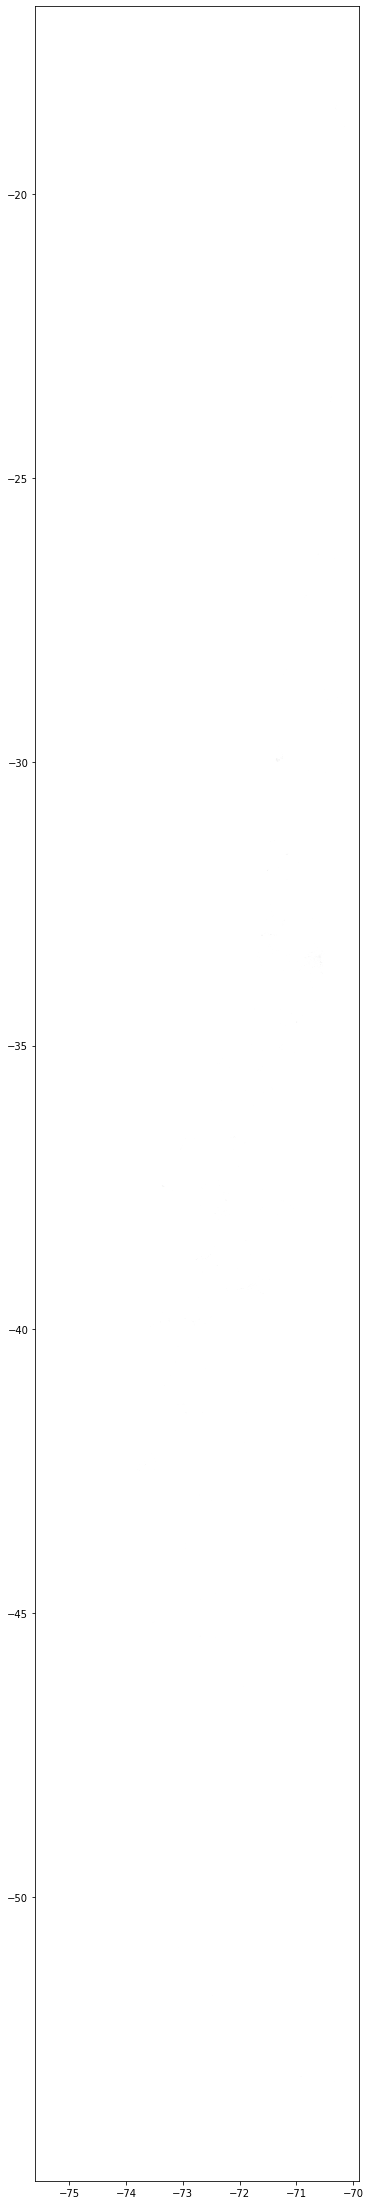

In [93]:
#nuevo plot con crop customizado
boxed_gdf.query('inside_box == True').plot(figsize=(40,40))

In [63]:
#mascara para encontrar keyword santiago en columna name
mask = df_buildings.name.str.find('Santiago')

In [66]:
df_buildings[mask > 0]

,osm_id,office,buildingle,buildingma,addrstreet,building,addrfull,addrhousen,source,name,addrcity,geometry
1,23393750.0,None,None,None,Avenida Libertador Bernardo O'Higgins,yes,None,3850,Reconocimiento cortográfico de campo 2016 por KG,Terminal de Buses Santiago,Santiago de Chile,"POLYGON ((-70.68903 -33.45370, -70.68769 -33.4..."
13,24964134.0,None,3,None,None,civic,None,None,None,Ilustre Municipalidad de Santiago,None,"POLYGON ((-70.65056 -33.43685, -70.65017 -33.4..."
25,25107479.0,None,None,None,Nueva Tajamar,commercial,None,481,None,World Trade Center Santiago,Las Condes,"POLYGON ((-70.60623 -33.41604, -70.60610 -33.4..."
2867,96762568.0,None,None,None,Avenida Vitacura,yes,None,2885,Bing,InterContinental Santiago,Las Condes,"POLYGON ((-70.60332 -33.41363, -70.60297 -33.4..."
2874,96762581.0,None,18,None,Avenida Vitacura,yes,None,2929,None,Holiday Inn Express - Santiago El Golf,Las Condes,"POLYGON ((-70.60274 -33.41188, -70.60268 -33.4..."
...,...,...,...,...,...,...,...,...,...,...,...,...
305603,631049658.0,None,None,None,21 de Mayo,yes,None,None,None,Paqueteria Santiago,Purranque,"POLYGON ((-73.16049 -40.91345, -73.16027 -40.9..."
309391,636068450.0,None,None,None,Avenida Alonso de Córdova,yes,None,6050,None,ICON Hotel Santiago,Las Condes,"POLYGON ((-70.56822 -33.40780, -70.56820 -33.4..."
339075,-9430586.0,None,None,None,Merced,yes,None,None,Reconocimiento cortográfico de campo 2016 por KG,Museo de Santiago - Casa Colorada,None,"POLYGON ((-70.64943 -33.43844, -70.64941 -33.4..."
343197,-9527921.0,None,None,None,La Bolsa,commercial,None,64,None,Bolsa de Comercio de Santiago,Santiago,"POLYGON ((-70.65191 -33.44240, -70.65191 -33.4..."


In [ ]:
def add_basemap(ax, zoom, url='http://tile.stamen.com/terrain/tileZ/tileX/tileY.png'):
    xmin, xmax, ymin, ymax = ax.axis()
    basemap, extent = ctx.bounds2img(xmin, ymin, xmax, ymax, zoom=zoom, url=url)
    ax.imshow(basemap, extent=extent, interpolation='bilinear')
    # restore original x/y limits
    ax.axis((xmin, xmax, ymin, ymax))